In [47]:
#Importing necessary elements
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
#Loading the dataset into "df"
df=pd.read_csv('../input/heart-disease-uci/heart.csv')

In [49]:
#looking at the first five rows of the dataset.You can see more rows by adding parameter into the head():egdf.head(10)
#would show you first ten rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I got the  descriotions from one of the notebooks on kaggle.
age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type 0: Typical angina: chest pain related decrease blood supply to the heart 1: Atypical angina: chest pain not related to heart 2: Non-anginal pain: typically esophageal spasms (non heart related) 3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes

restecg - resting electrocardiographic results 0: Nothing to note 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

slope - the slope of the peak exercise ST segment 0: Upsloping: better heart rate with excercise (uncommon) 1: Flatsloping: minimal change (typical healthy heart) 2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)

thal - thalium stress result 1,3: normal 6: fixed defect: used to be defect but ok now 7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

EDA-EXPLORATORY DATA ANALYSIS(UNDERSTANDING THE DATASET)

In [50]:
#Gives the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
#Gives the shape
df.shape

(303, 14)

In [52]:
#Describes the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


PANDAS PROFILING GIVES US A REPORT ON THE ENTIRE DATASET(you'll have to install it incase you haven't.) Pandas profiling is an open source Python module with which we can quickly
do an exploratory data analysis with just a few lines of code.

In [19]:
import pandas_profiling 

pandas_profiling.ProfileReport(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f830e90aa10>,
      dtype=object)

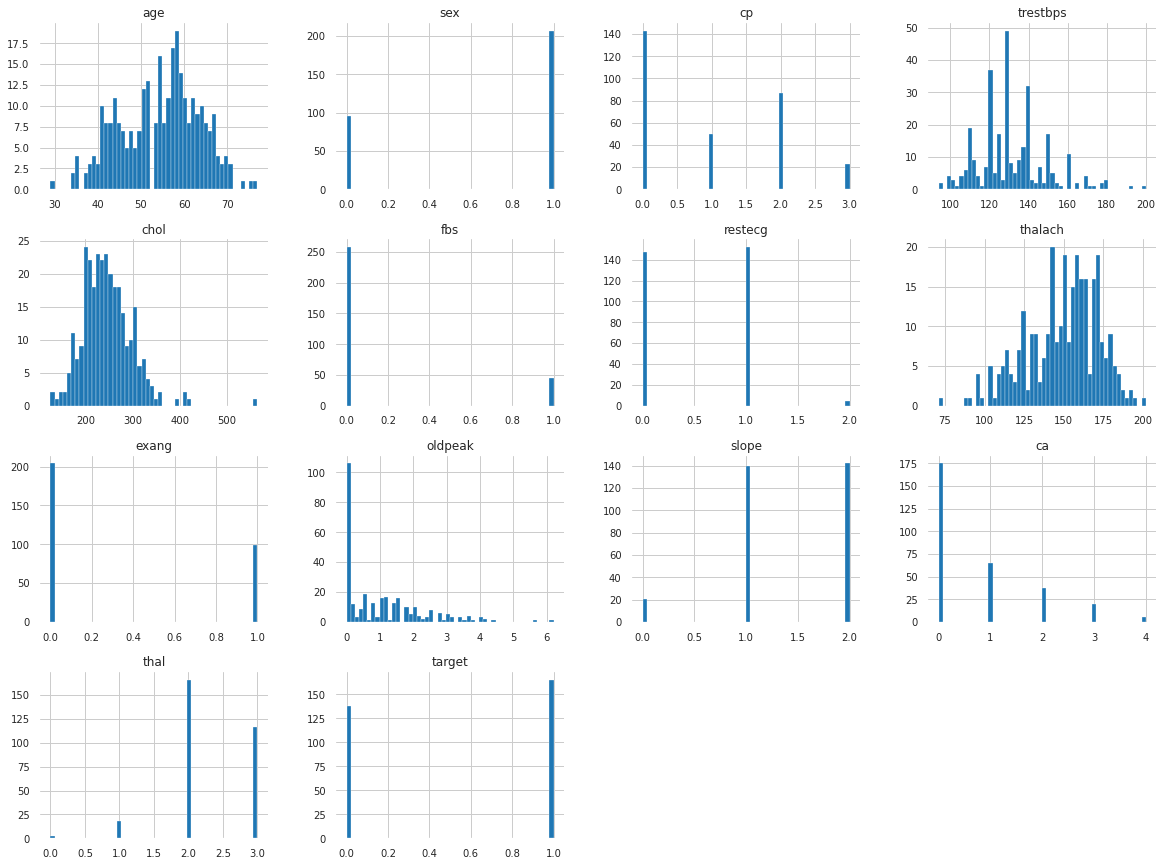

In [53]:
#This function calls matplotlib.pyplot.hist() , on each series in the DataFrame, resulting in one histogram per column.
df.hist(bins=50,figsize=(20,15))

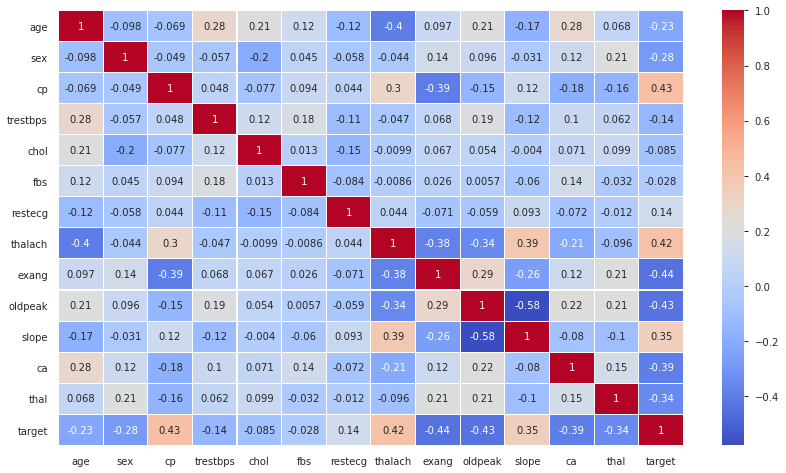

In [54]:
#heatmap
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

Inorder to build the model we will first have to drop the target(ouput column from the dataset and give the remaining 
values to X and give the target(result) column to y

In [55]:
X = df.drop(['target'],axis=1)
y = df['target']

In [56]:
#Importing train_test_split from sklearn.model_selection,as it will be used to split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

I did not remove any outliers and did not normalise the values for the sake of simplicity.Out of many models random forest classifer gave the best accuracy

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)
print("It's show time of the Accuracy: ",rfc.score(X_test,y_test))

It's show time of the Accuracy:  0.9180327868852459


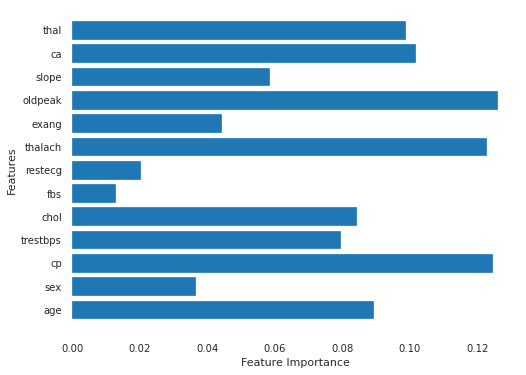

In [58]:
#I wrote a function to check for the amount of contribution that a feature that has in the decision making(output)
def plot_feature_importance(rfc):
    plt.figure(figsize=(8,6))
    n_fetures=13
    plt.barh(range(n_fetures),rfc.feature_importances_,align='center')
    plt.yticks(np.arange(n_fetures),X)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1,n_fetures)
    
plot_feature_importance(rfc)

In [59]:
#Since fbs and restecg does not contribute much towards the decison making, i'll drop those two columns from the dataset
df2=df.drop(['fbs','restecg'],axis=1)

In [60]:
df2.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [61]:
X = df2.drop(['target'],axis=1)
y = df2['target']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)
print("It's show time of the Accuracy: ",rfc.score(X_test,y_test))

It's show time of the Accuracy:  0.9016393442622951


In [71]:
#printing the test dataset
print(X_test)

     age  sex  cp  trestbps  chol  thalach  exang  oldpeak  slope  ca  thal
113   43    1   0       110   211      161      0      0.0      2   0     3
249   69    1   2       140   254      146      0      2.0      1   3     3
18    43    1   0       150   247      171      0      1.5      2   0     2
142   42    0   2       120   209      173      0      0.0      1   0     2
299   45    1   3       110   264      132      0      1.2      1   0     3
..   ...  ...  ..       ...   ...      ...    ...      ...    ...  ..   ...
64    58    1   2       140   211      165      0      0.0      2   0     2
133   41    1   1       110   235      153      0      0.0      2   0     2
204   62    0   0       160   164      145      0      6.2      0   3     3
180   55    1   0       132   353      132      1      1.2      1   1     3
11    48    0   2       130   275      139      0      0.2      2   0     2

[61 rows x 11 columns]


In [66]:
#printing the test's expected result
print(y_test)

113    1
249    0
18     1
142    1
299    0
      ..
64     1
133    1
204    0
180    0
11     1
Name: target, Length: 61, dtype: int64


In [67]:
#Let us make some prediction.(you can input the values from the above printed X_test and compare it's result with y_test)
print(rfc.predict([[55,1,0,132,353,132,1,1.2,1,1,3]]))
print(rfc.predict([[48,0,2,130,275,139,0,0.2,2,0,2]]))
print(rfc.predict([[56,1,1,120,236,178,0,0.8,2,0,2]]))

[0]


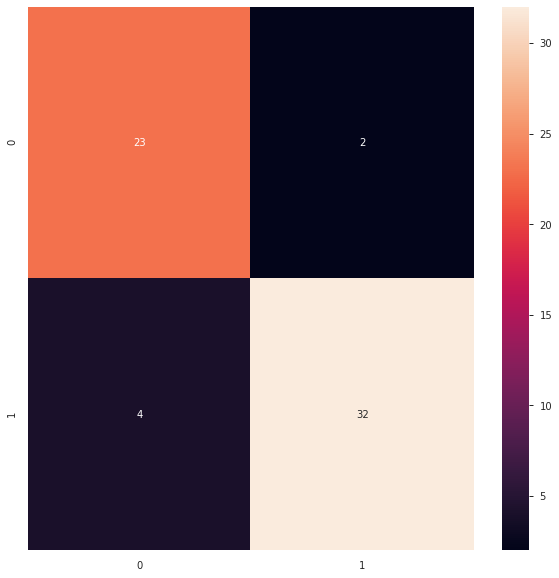

In [68]:
from sklearn.metrics import confusion_matrix
X_test = rfc.predict(X_test)
cm = confusion_matrix(y_test,X_test)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.show()